In [19]:
# import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
#load data
df=pd.read_csv(r"C:\Users\HP\Downloads\student_performance_data.csv")

In [21]:
#dimension
df.shape

(100, 6)

In [22]:
#Show first five row of data
df.head()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
0,1,7.06,8.11,82.20,3.16,79.86
1,2,3.94,5.38,95.63,6.64,66.87
2,3,4.36,NaN,100.00,8.01,NaN
3,4,3.76,NaN,91.96,6.66,68.05
4,5,3.98,6.54,86.54,7.84,63.20


In [23]:
#Show last five row of data
df.tail()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
95,96,4.54,7.19,100.00,6.14,74.05
96,97,0.04,6.58,97.90,3.42,38.47
97,98,1.70,6.08,70.22,8.00,42.89
98,99,4.08,6.55,87.14,9.34,84.02
99,100,1.17,4.38,82.59,8.96,54.00


In [24]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       100 non-null    int64  
 1   StudyHours      97 non-null     float64
 2   SleepHours      97 non-null     float64
 3   AttendanceRate  100 non-null    float64
 4   Participation   100 non-null    float64
 5   TestScore       97 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [25]:
df.describe()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
count,100.000000,97.000000,97.000000,100.000000,100.000000,97.000000
mean,50.500000,3.251649,6.452784,85.237000,5.966600,59.403608
std,29.011492,1.558961,1.027601,9.988643,2.089859,11.490708
min,1.000000,0.000000,4.000000,57.640000,0.890000,29.060000
25%,25.750000,2.080000,5.730000,77.247500,4.520000,51.310000
50%,50.500000,3.290000,6.540000,86.330000,6.050000,60.000000
75%,75.250000,4.080000,7.150000,93.610000,7.422500,67.880000
max,100.000000,7.060000,8.990000,100.000000,10.000000,86.940000


In [26]:
#findings null values
df.isnull().sum()

StudentID         0
StudyHours        3
SleepHours        3
AttendanceRate    0
Participation     0
TestScore         3
dtype: int64

In [27]:
df_clean=df.dropna().head()
df_clean
df.fillna(0,inplace=True)

In [28]:
#finding duplicates
df.duplicated().sum()

0

In [29]:
df.describe()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.154100,6.259200,85.237000,5.966600,57.621500
std,29.011492,1.633249,1.499294,9.988643,2.089859,15.223675
min,1.000000,0.000000,0.000000,57.640000,0.890000,0.000000
25%,25.750000,1.885000,5.685000,77.247500,4.520000,50.272500
50%,50.500000,3.280000,6.520000,86.330000,6.050000,59.955000
75%,75.250000,4.042500,7.120000,93.610000,7.422500,67.760000
max,100.000000,7.060000,8.990000,100.000000,10.000000,86.940000


In [30]:
studyhours=df_clean["StudyHours"].to_numpy()
print("Avg_hours:",np.mean(studyhours))
print("std_hours:",np.std(studyhours))
print()
testscore=df_clean["TestScore"].to_numpy()
print("Avg_hours:",np.mean(testscore))
print("std_hours:",np.std(testscore))


Avg_hours: 3.846
std_hours: 1.8216651723080177

Avg_hours: 63.096000000000004
std_hours: 11.064860776349605


In [13]:
corr=np.corrcoef(studyhours,testscore)[0,1]
print("Correlation(studyhours V/S testscore)",corr)

Correlation(studyhours V/S testscore) 0.9472394009019696


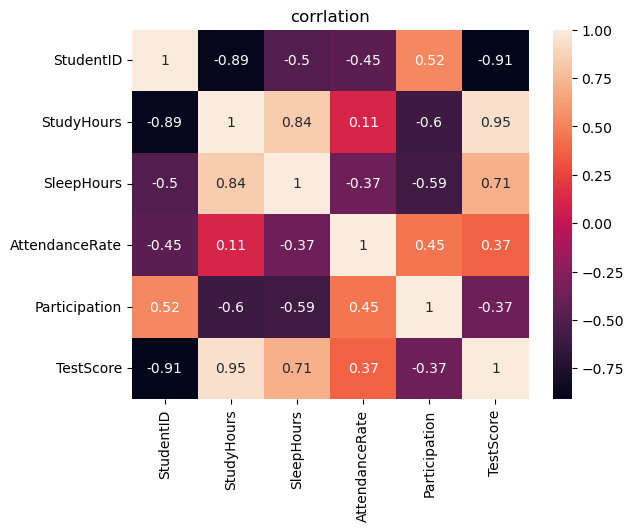

In [14]:
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)
plt.title("corrlation")
plt.show()

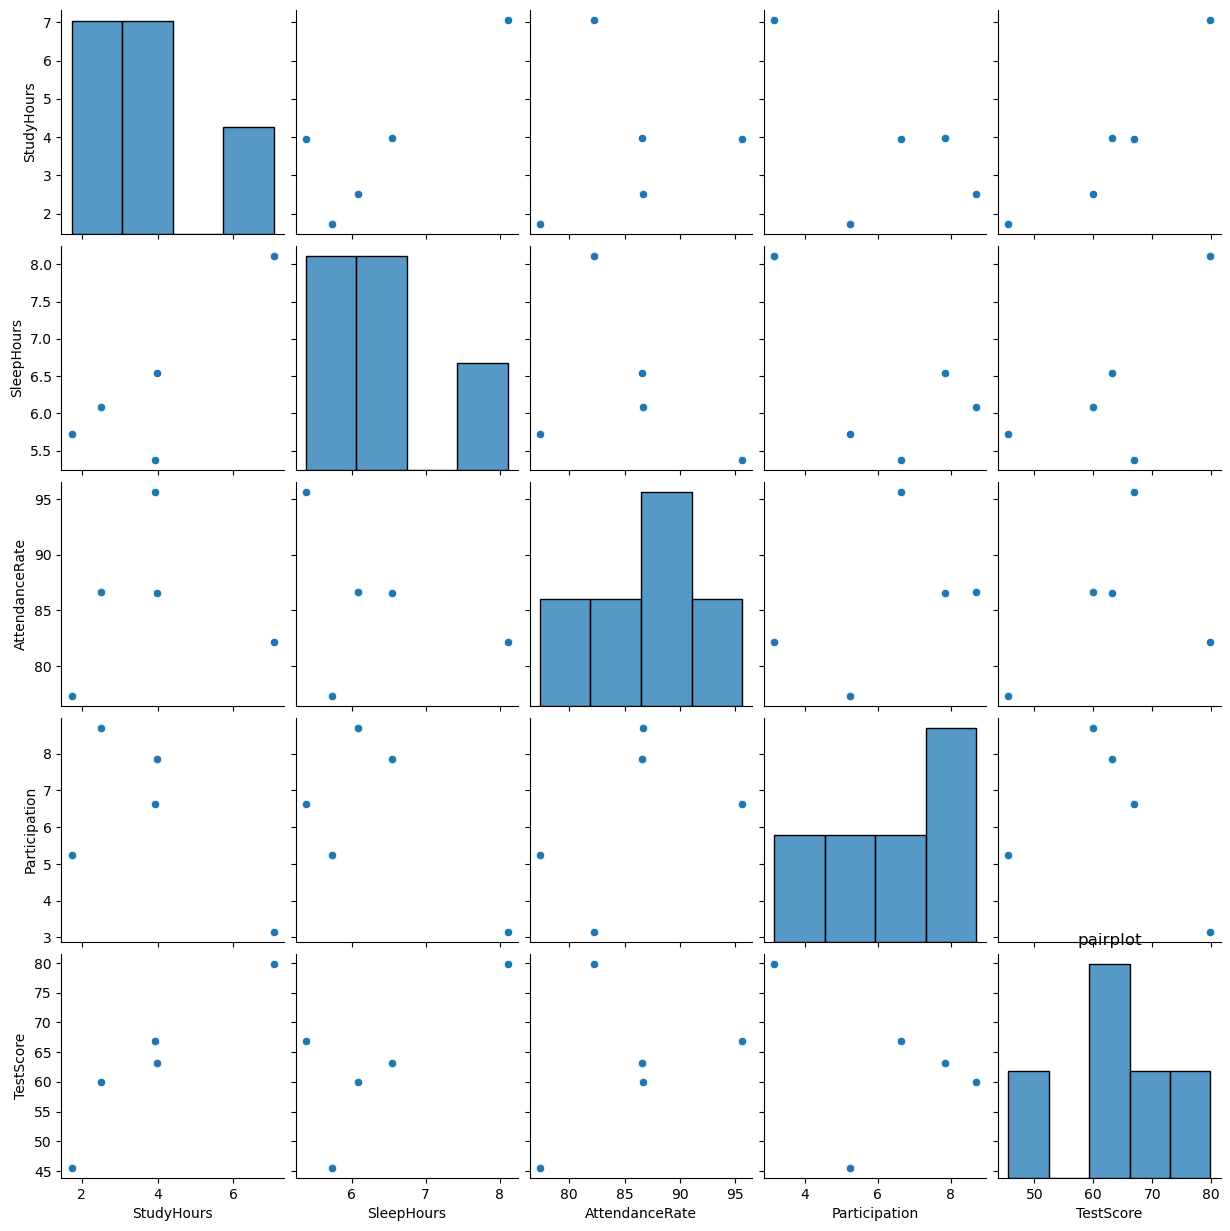

In [15]:
sns.pairplot(df_clean[["StudyHours","SleepHours","AttendanceRate","Participation","TestScore"]])
plt.title("pairplot")
plt.show()

In [16]:
print(df.StudyHours.unique())

[7.06 3.94 4.36 3.76 3.98 2.52 1.73 3.91 0.   4.11 3.79 2.12 3.28 1.86
 1.6  4.43 3.29 5.97 6.91 4.03 3.45 5.54 0.44 1.26 2.8  3.59 3.25 4.21
 3.11 3.96 2.25 1.87 1.58 3.73 2.82 5.85 3.36 5.99 3.3  1.3  3.   4.54
 2.77 2.95 3.97 6.23 2.08 2.48 3.22 2.28 3.84 1.61 5.79 3.92 3.58 6.13
 2.44 3.35 4.02 4.55 5.91 1.49 1.89 1.9  0.93 5.22 4.44 4.49 1.43 4.94
 0.8  2.26 2.76 3.33 1.72 5.31 4.   2.19 2.15 5.11 1.64 2.41 0.04 1.7
 4.08 1.17]


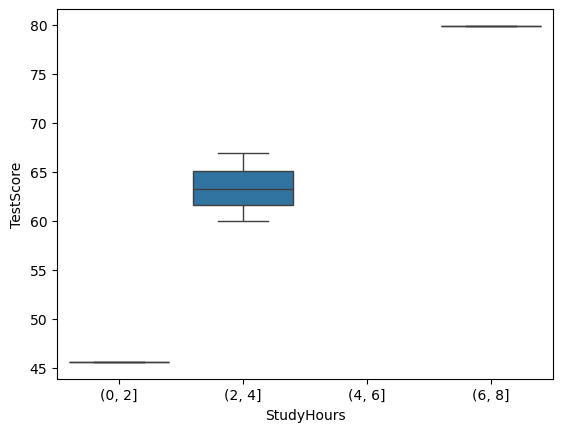

In [17]:
sns.boxplot(x=pd.cut(df_clean["StudyHours"],bins=[0,2,4,6,8]),y="TestScore",data=df_clean)
plt.show()

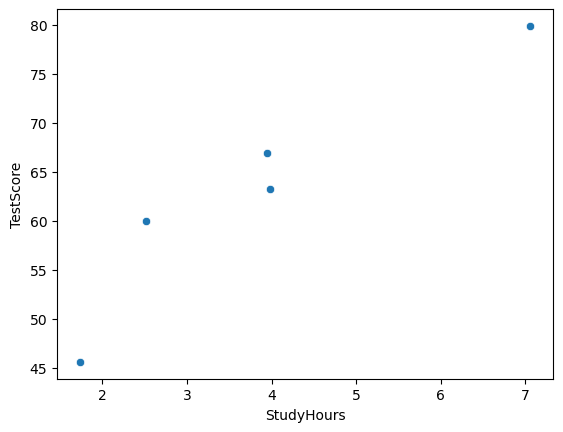

In [18]:
sns.scatterplot(x="StudyHours",y="TestScore",data=df_clean)
plt.show()